<ipython-input-27-d8739c49e3c8>:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  main_circle = Circle(group_center, radius=3, color='lightblue', edgecolor='black', linewidth=2)
<ipython-input-27-d8739c49e3c8>:57: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  new_circle = Circle(new_center, radius=1, color='yellow', edgecolor='black', linewidth=2)


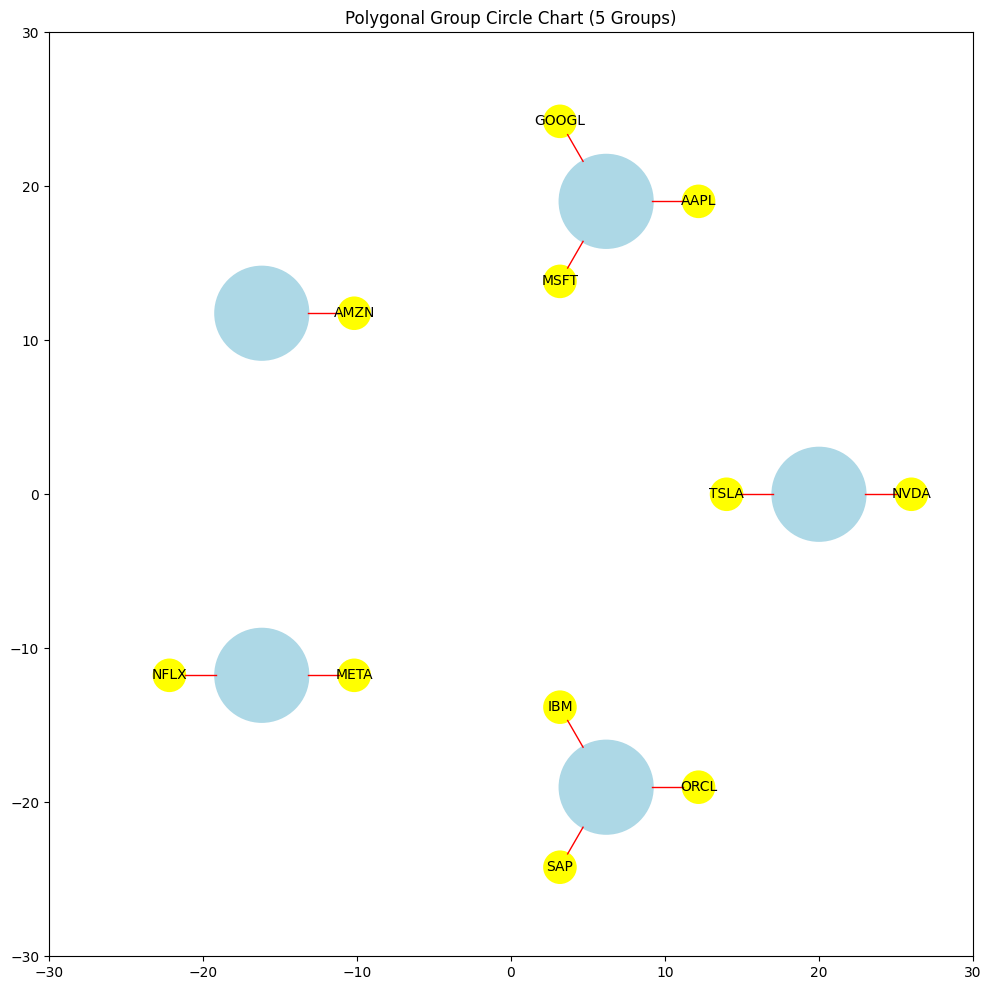

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

def draw_polygonal_group_circle_chart(groups):
    fig, ax = plt.subplots(figsize=(12, 12))
    main_radius = 20  # 메인 원들 간 간격을 조정하는 반지름 (값을 늘려 간격 조정)
    extension_factor = 2  # 작은 원과의 거리 조정
    num_groups = len(groups)  # 메인 원의 개수

    if num_groups == 1:
        # 한 개만 있으면 (0, 0)에 배치
        group_centers = [(0, 0)]
    else:
        # 다각형 배치 계산
        angle_step = 360 / num_groups
        group_centers = [
            (
                main_radius * np.cos(np.radians(i * angle_step)),
                main_radius * np.sin(np.radians(i * angle_step)),
            )
            for i in range(num_groups)
        ]

    # 각 그룹에 대해 메인 원과 작은 원 그리기
    for group_idx, (group_center, companies) in enumerate(zip(group_centers, groups)):
        num_companies = len(companies)

        # 각도 설정
        angle_step = 360 / num_companies if num_companies > 0 else 0

        # 메인 원 추가
        main_circle = Circle(group_center, radius=3, color='lightblue', edgecolor='black', linewidth=2)
        ax.add_patch(main_circle)

        for i, company in enumerate(companies):
            # 각도 계산
            angle_deg = i * angle_step
            angle_rad = np.radians(angle_deg)

            # 선의 시작점과 끝점 계산
            x_start = group_center[0] + 3 * np.cos(angle_rad)
            y_start = group_center[1] + 3 * np.sin(angle_rad)
            x_end = group_center[0] + (3 + extension_factor) * np.cos(angle_rad)
            y_end = group_center[1] + (3 + extension_factor) * np.sin(angle_rad)

            # 선 그리기
            ax.plot([x_start, x_end], [y_start, y_end], color='red', linewidth=1)

            # 새 원 중심 계산
            new_center = (
                group_center[0] + (3 + extension_factor * 1.5) * np.cos(angle_rad),
                group_center[1] + (3 + extension_factor * 1.5) * np.sin(angle_rad),
            )

            # 새 원 추가
            new_circle = Circle(new_center, radius=1, color='yellow', edgecolor='black', linewidth=2)
            ax.add_patch(new_circle)

            # 회사 이름 표시
            ax.text(
                new_center[0], new_center[1],
                company, color='black', fontsize=8 if num_companies > 20 else 10,
                ha='center', va='center', rotation=angle_deg if num_companies > 10 else 0
            )

    # 그래프 설정
    ax.set_xlim(-main_radius - 10, main_radius + 10)
    ax.set_ylim(-main_radius - 10, main_radius + 10)
    ax.set_aspect('equal')
    plt.title(f"Polygonal Group Circle Chart ({len(groups)} Groups)")
    plt.show()

# 함수 호출 예시
draw_polygonal_group_circle_chart([
    ['NVDA', 'TSLA'],
    ['AAPL', 'GOOGL', 'MSFT'],
    ['AMZN'],
    ['META', 'NFLX'],
    ['ORCL', 'IBM', 'SAP']
])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


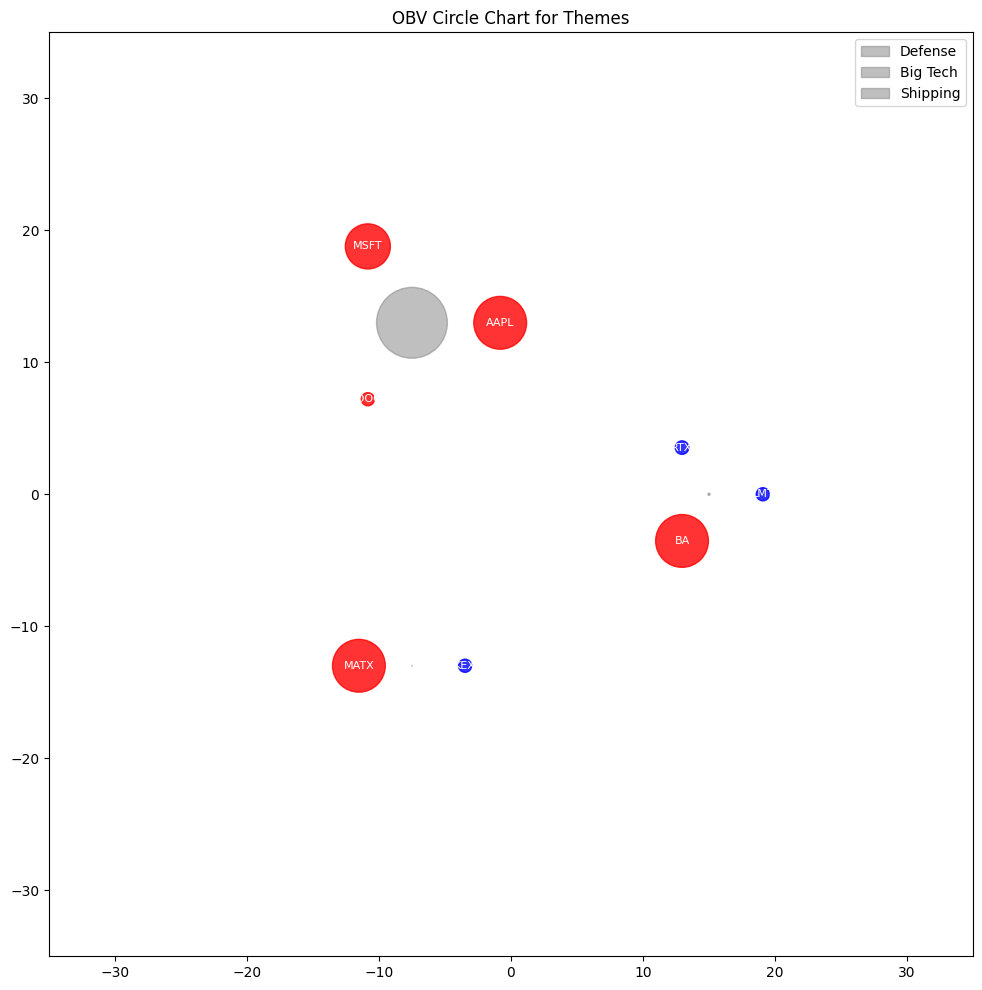

In [ ]:
def plot_theme_circle_chart(themes, window=24):
    fig, ax = plt.subplots(figsize=(12, 12))
    main_radius = 15  # 다각형의 반지름
    extension_factor = 4  # 메인 원 밖으로 작은 원을 배치하는 거리
    num_themes = len(themes)

    # 다각형 배치 계산
    angle_step = 360 / num_themes
    theme_centers = [
        (
            main_radius * np.cos(np.radians(i * angle_step)),
            main_radius * np.sin(np.radians(i * angle_step))
        )
        for i in range(num_themes)
    ]

    for theme_idx, (theme_name, tickers) in enumerate(zip(themes.keys(), themes.values())):
        obv_values = []
        for ticker in tickers:
            data = yf.download(ticker, start="2020-01-01", end="2024-12-09")
            if 'Close' in data.columns and 'Volume' in data.columns:
                data = calculate_obv_with_window(data, window)
                obv_values.append(data['OBV_Window'].iloc[-1])

        # 메인 원의 크기: OBV 절댓값 평균
        avg_obv = sum(abs(v) for v in obv_values) / len(obv_values) if obv_values else 1
        main_circle_radius = avg_obv * 15 / 1e9  # 스케일링

        # 메인 원 추가
        group_center = theme_centers[theme_idx]
        main_circle = Circle(group_center, radius=main_circle_radius, color='gray', alpha=0.5, label=theme_name)
        ax.add_patch(main_circle)

        # 작은 원과 선 배치
        num_tickers = len(tickers)
        angle_step_tickers = 360 / num_tickers if num_tickers > 0 else 0

        # 그룹 내 OBV 값 스케일링
        max_obv = max(obv_values)
        min_obv = min(obv_values)
        range_obv = max_obv - min_obv if max_obv != min_obv else 1  # 방지: max == min

        for i, (ticker, obv) in enumerate(zip(tickers, obv_values)):
            angle_deg = i * angle_step_tickers
            angle_rad = np.radians(angle_deg)

            # 작은 원의 위치
            x = group_center[0] + (main_circle_radius + extension_factor) * np.cos(angle_rad)
            y = group_center[1] + (main_circle_radius + extension_factor) * np.sin(angle_rad)

            # 작은 원의 크기: 그룹 내 스케일링 (0.5 ~ 1.5로 크기 조정)
            normalized_obv = (obv - min_obv) / range_obv * 2 # 0 ~ 1 사이로 정규화
            small_circle_radius = 0.5 + normalized_obv  # 크기를 0.5 ~ 1.5 사이로 조정
            circle_color = 'red' if obv > 0 else 'blue'

            # 작은 원 추가
            small_circle = Circle((x, y), small_circle_radius, color=circle_color, alpha=0.8)
            ax.add_patch(small_circle)

            # 티커 이름 표시
            ax.text(x, y, ticker, fontsize=8, ha='center', va='center', color='white')

    # 그래프 설정
    ax.set_xlim(-main_radius - 20, main_radius + 20)
    ax.set_ylim(-main_radius - 20, main_radius + 20)
    ax.set_aspect('equal')
    plt.title(f"OBV Circle Chart for Themes")
    plt.legend(loc="upper right")
    plt.show()

# 테마 설정
themes = {
    'Defense': ['LMT', 'RTX', 'BA'],
    'Big Tech': ['AAPL', 'MSFT', 'GOOGL'],
    'Shipping': ['KEX', 'MATX']
}

# 플롯 호출
plot_theme_circle_chart(themes, window=24)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Animation saved as 'obv_circle_chart.mp4'


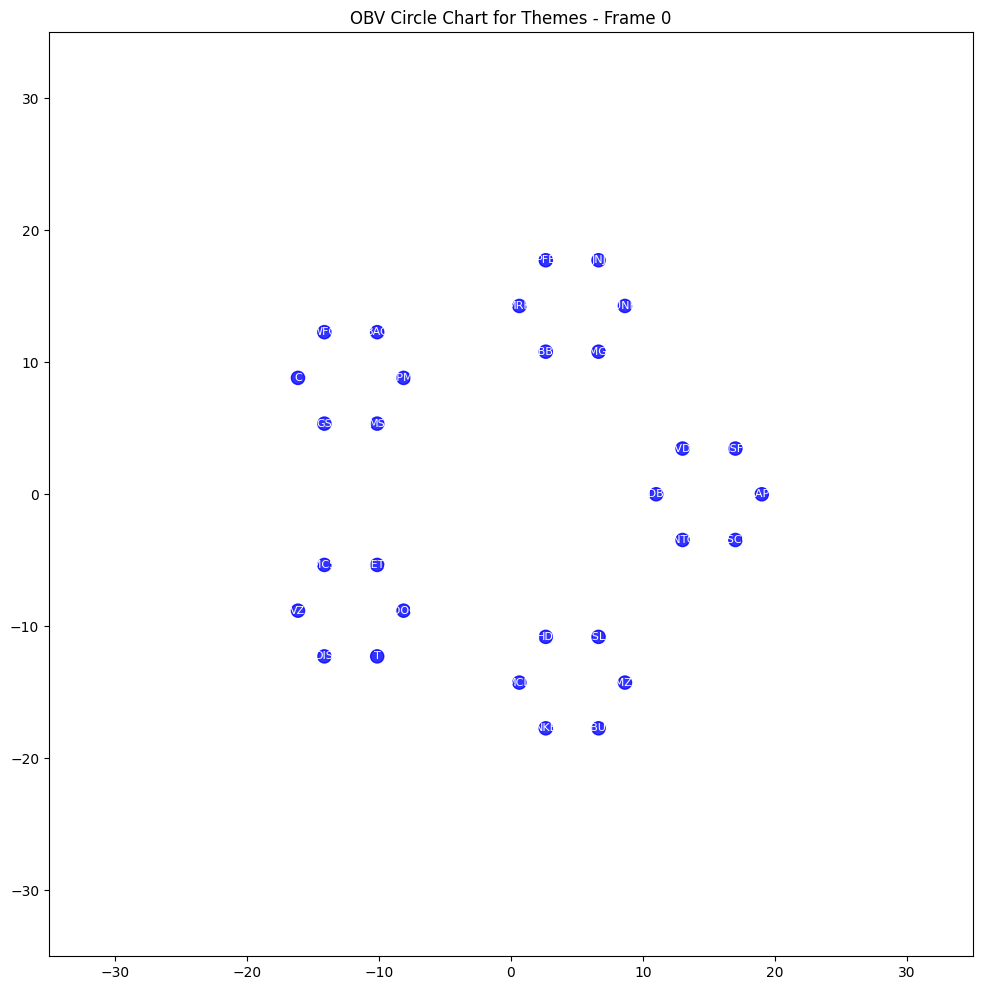

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation, FFMpegWriter
import numpy as np

def calculate_obv_with_window(data, window=5):
    obv = [0]
    obv_changes = [0]

    for i in range(1, len(data)):
        obv_change = 0
        if data['Close'].values[i] > data['Close'].values[i - 1]:
            obv_change = data['Volume'].values[i]
        elif data['Close'].values[i] < data['Close'].values[i - 1]:
            obv_change = -data['Volume'].values[i]

        obv_changes.append(obv_change)

        if i >= window:
            rolling_obv = sum(obv_changes[i-window:i])
        else:
            rolling_obv = sum(obv_changes[:i+1])

        obv.append(rolling_obv)

    data['OBV_Window'] = obv
    return data

# Load data for all themes
def load_theme_data(themes, window=24):
    theme_data = {}
    for theme_name, tickers in themes.items():
        theme_data[theme_name] = {}
        for ticker in tickers:
            data = yf.download(ticker, start="2023-10-01", end="2024-11-09")
            if 'Close' in data.columns and 'Volume' in data.columns:
                data = calculate_obv_with_window(data, window)
                theme_data[theme_name][ticker] = data['OBV_Window'].tolist()
    return theme_data

# Animate function
def animate(frame):
    ax.clear()
    ax.set_xlim(-main_radius - 20, main_radius + 20)
    ax.set_ylim(-main_radius - 20, main_radius + 20)
    ax.set_aspect('equal')
    ax.set_title(f"OBV Circle Chart for Themes - Frame {frame}")

    for theme_idx, (theme_name, tickers) in enumerate(theme_data.items()):
        group_center = theme_centers[theme_idx]
        obv_values = [data[min(frame, len(data)-1)] for data in tickers.values()]

        # Draw main circle
        avg_obv = sum(abs(v) for v in obv_values) / len(obv_values) if obv_values else 1
        main_circle_radius = avg_obv * 10 / 1e9
        main_circle = Circle(group_center, radius=main_circle_radius, color='gray', alpha=0.5, label=theme_name)
        ax.add_patch(main_circle)

        # Small circle scaling within the group
        max_obv = max(obv_values)
        min_obv = min(obv_values)
        range_obv = max_obv - min_obv if max_obv != min_obv else 1

        # Draw small circles
        angle_step_tickers = 360 / len(tickers) if len(tickers) > 0 else 0
        for i, (ticker, obv) in enumerate(zip(tickers.keys(), obv_values)):
            angle_deg = i * angle_step_tickers
            angle_rad = np.radians(angle_deg)

            x = group_center[0] + (main_circle_radius + extension_factor) * np.cos(angle_rad)
            y = group_center[1] + (main_circle_radius + extension_factor) * np.sin(angle_rad)

            normalized_obv = (obv - min_obv) / range_obv  # Scale 0-1
            small_circle_radius = 0.5 + normalized_obv  # Scale between 0.5 and 1.5
            circle_color = 'red' if obv > 0 else 'blue'

            small_circle = Circle((x, y), small_circle_radius, color=circle_color, alpha=0.8)
            ax.add_patch(small_circle)

            # Add ticker text
            ax.text(x, y, ticker, fontsize=8, ha='center', va='center', color='white')

themes = {
    'Information Technology': ['AAPL', 'MSFT', 'NVDA', 'ADBE', 'INTC', 'CSCO'],
    'Health Care': ['UNH', 'JNJ', 'PFE', 'MRK', 'ABBV', 'AMGN'],
    'Financials': ['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS'],
    'Communication Services': ['GOOGL', 'META', 'CMCSA', 'VZ', 'DIS', 'T'],
    'Consumer Discretionary': ['AMZN', 'TSLA', 'HD', 'MCD', 'NKE', 'SBUX']
}

theme_data = load_theme_data(themes, window=24)

main_radius = 15
extension_factor = 4
num_themes = len(themes)
angle_step = 360 / num_themes
theme_centers = [
    (
        main_radius * np.cos(np.radians(i * angle_step)),
        main_radius * np.sin(np.radians(i * angle_step))
    )
    for i in range(num_themes)
]

fig, ax = plt.subplots(figsize=(12, 12))

# Create animation
frames = max(len(data) for theme in theme_data.values() for data in theme.values())
ani = FuncAnimation(fig, animate, frames=frames, interval=100, repeat=True)

# Save as MP4
writer = FFMpegWriter(fps=10, metadata={'artist': 'Matplotlib'}, bitrate=1800)
ani.save("obv_circle_chart.mp4", writer=writer)

print("Animation saved as 'obv_circle_chart.mp4'")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Animation saved as 'obv_circle_chart_with_dates.mp4'


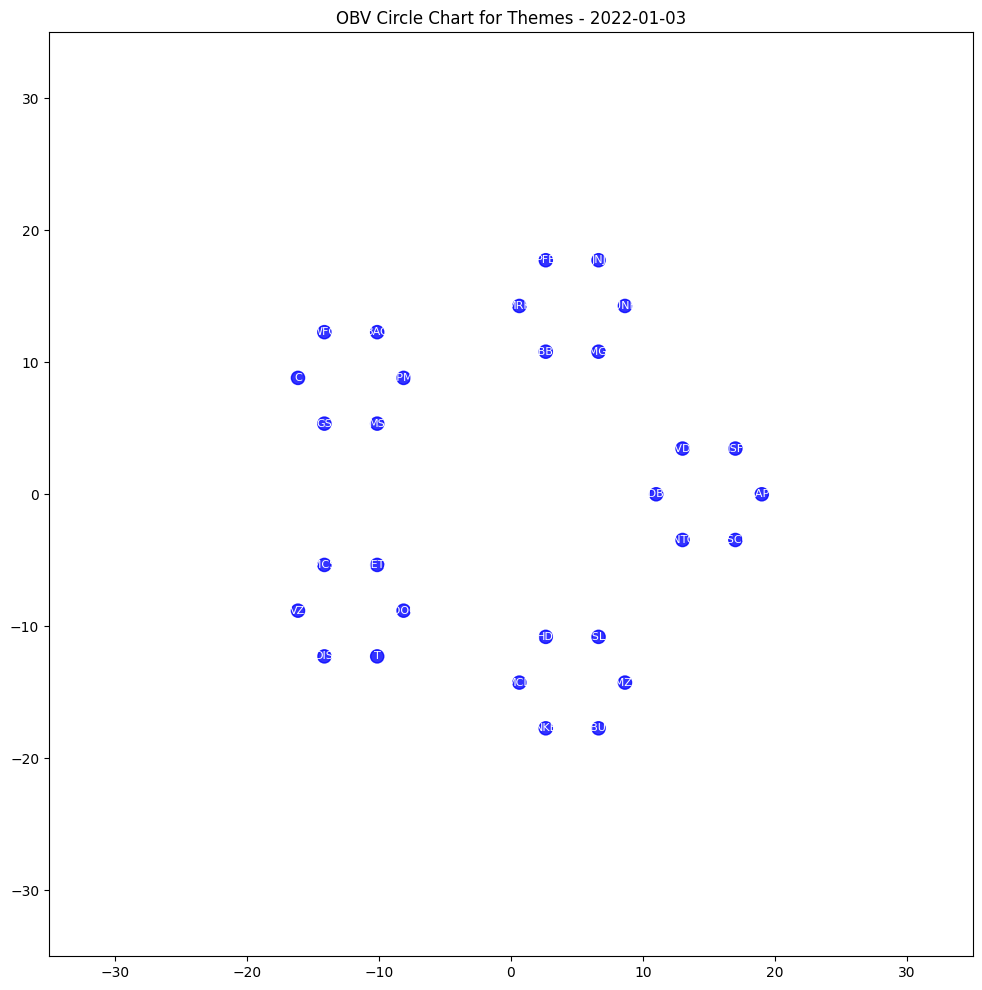

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation, FFMpegWriter
import numpy as np

def calculate_obv_with_window(data, window=5):
    obv = [0]
    obv_changes = [0]

    for i in range(1, len(data)):
        obv_change = 0
        if data['Close'].values[i] > data['Close'].values[i - 1]:
            obv_change = data['Volume'].values[i]
        elif data['Close'].values[i] < data['Close'].values[i - 1]:
            obv_change = -data['Volume'].values[i]

        obv_changes.append(obv_change)

        if i >= window:
            rolling_obv = sum(obv_changes[i-window:i])
        else:
            rolling_obv = sum(obv_changes[:i+1])

        obv.append(rolling_obv)

    data['OBV_Window'] = obv
    return data

# Load data for all themes
def load_theme_data(themes, window=24):
    theme_data = {}
    for theme_name, tickers in themes.items():
        theme_data[theme_name] = {}
        for ticker in tickers:
            data = yf.download(ticker, start="2022-01-01", end="2024-12-09")
            if 'Close' in data.columns and 'Volume' in data.columns:
                data = calculate_obv_with_window(data, window)
                theme_data[theme_name][ticker] = {
                    "index": data.index.tolist(),
                    "obv": data['OBV_Window'].tolist()
                }
    return theme_data

# Animate function
def animate(frame):
    ax.clear()
    ax.set_xlim(-main_radius - 20, main_radius + 20)
    ax.set_ylim(-main_radius - 20, main_radius + 20)
    ax.set_aspect('equal')

    # Get the current date for the frame
    current_date = theme_data[next(iter(theme_data))][next(iter(theme_data[next(iter(theme_data))]))]["index"][frame]

    ax.set_title(f"OBV Circle Chart for Themes - {current_date.strftime('%Y-%m-%d')}")

    for theme_idx, (theme_name, tickers) in enumerate(theme_data.items()):
        group_center = theme_centers[theme_idx]
        obv_values = [data["obv"][min(frame, len(data["obv"]) - 1)] for data in tickers.values()]

        # Draw main circle
        avg_obv = sum(abs(v) for v in obv_values) / len(obv_values) if obv_values else 1
        main_circle_radius = avg_obv * 10 / 1e9
        main_circle = Circle(group_center, radius=main_circle_radius, color='gray', alpha=0.5, label=theme_name)
        ax.add_patch(main_circle)

        # Small circle scaling within the group
        max_obv = max(obv_values)
        min_obv = min(obv_values)
        range_obv = max_obv - min_obv if max_obv != min_obv else 1

        # Draw small circles
        angle_step_tickers = 360 / len(tickers) if len(tickers) > 0 else 0
        for i, (ticker, obv) in enumerate(zip(tickers.keys(), obv_values)):
            angle_deg = i * angle_step_tickers
            angle_rad = np.radians(angle_deg)

            x = group_center[0] + (main_circle_radius + extension_factor) * np.cos(angle_rad)
            y = group_center[1] + (main_circle_radius + extension_factor) * np.sin(angle_rad)

            normalized_obv = ( (obv - min_obv) / range_obv ) * 1.8  # Scale 0-1
            small_circle_radius = 0.5 + normalized_obv  # Scale between 0.5 and 1.5
            circle_color = 'red' if obv > 0 else 'blue'

            small_circle = Circle((x, y), small_circle_radius, color=circle_color, alpha=0.8)
            ax.add_patch(small_circle)

            # Add ticker text
            ax.text(x, y, ticker, fontsize=8, ha='center', va='center', color='white')
            ax.text(x, y + 1, obv, fontsize=8, ha='center', va='center', color='white')

# Settings for animation
themes = {
    'Information Technology': ['AAPL', 'MSFT', 'NVDA'],
    'Health Care': ['UNH', 'JNJ', 'PFE'],
    'Financials': ['JPM', 'BAC', 'WFC'],
    'Communication Services': ['GOOGL', 'META', 'CMCSA'],
    'Consumer Discretionary': ['AMZN', 'TSLA', 'HD']
}

theme_data = load_theme_data(themes, window=24)

main_radius = 15
extension_factor = 4
num_themes = len(themes)
angle_step = 360 / num_themes
theme_centers = [
    (
        main_radius * np.cos(np.radians(i * angle_step)),
        main_radius * np.sin(np.radians(i * angle_step))
    )
    for i in range(num_themes)
]

fig, ax = plt.subplots(figsize=(12, 12))

# Create animation
frames = min(len(data["obv"]) for theme in theme_data.values() for data in theme.values())
ani = FuncAnimation(fig, animate, frames=frames, interval=100, repeat=True)

# Save as MP4
writer = FFMpegWriter(fps=10, metadata={'artist': 'Matplotlib'}, bitrate=1800)
ani.save("obv_circle_chart_with_dates.mp4", writer=writer)

print("Animation saved as 'obv_circle_chart_with_dates.mp4'")
